In [ ]:
import chess
import tokenizer

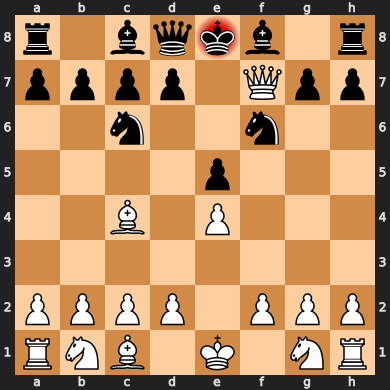

In [14]:
state = "r1bqkb1r/pppp1Qpp/2n2n2/4p3/2B1P3/8/PPPP1PPP/RNB1K1NR b KQkq - 0 4"
board = chess.Board(state)
board

In [15]:
token = tokenizer.tokenize(board.fen())
token

tensor([30, 20, 31, 11, 22, 21, 11, 31, 20, 18, 18, 18, 18, 31, 27, 18, 18, 31,
        31, 19, 31, 31, 19, 31, 31, 31, 31, 31, 31, 18, 31, 31, 31, 31, 31, 24,
        31, 23, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 23, 23, 23, 23, 31,
        23, 23, 23, 26, 25, 24, 31, 28, 31, 25, 26, 28, 27, 21, 22, 31, 31,  0,
        31, 31,  4, 31, 31], dtype=torch.uint8)

In [27]:
import utils

In [ ]:
print(utils.ACTION_TO_MOVE)

{0: 'a1b1', 1: 'a1c1', 2: 'a1d1', 3: 'a1e1', 4: 'a1f1', 5: 'a1g1', 6: 'a1h1', 7: 'a1a2', 8: 'a1b2', 9: 'a1a3', 10: 'a1c3', 11: 'a1a4', 12: 'a1d4', 13: 'a1a5', 14: 'a1e5', 15: 'a1a6', 16: 'a1f6', 17: 'a1a7', 18: 'a1g7', 19: 'a1a8', 20: 'a1h8', 21: 'a1c2', 22: 'a1b3', 23: 'b1a1', 24: 'b1c1', 25: 'b1d1', 26: 'b1e1', 27: 'b1f1', 28: 'b1g1', 29: 'b1h1', 30: 'b1a2', 31: 'b1b2', 32: 'b1c2', 33: 'b1b3', 34: 'b1d3', 35: 'b1b4', 36: 'b1e4', 37: 'b1b5', 38: 'b1f5', 39: 'b1b6', 40: 'b1g6', 41: 'b1b7', 42: 'b1h7', 43: 'b1b8', 44: 'b1d2', 45: 'b1a3', 46: 'b1c3', 47: 'c1a1', 48: 'c1b1', 49: 'c1d1', 50: 'c1e1', 51: 'c1f1', 52: 'c1g1', 53: 'c1h1', 54: 'c1b2', 55: 'c1c2', 56: 'c1d2', 57: 'c1a3', 58: 'c1c3', 59: 'c1e3', 60: 'c1c4', 61: 'c1f4', 62: 'c1c5', 63: 'c1g5', 64: 'c1c6', 65: 'c1h6', 66: 'c1c7', 67: 'c1c8', 68: 'c1a2', 69: 'c1e2', 70: 'c1b3', 71: 'c1d3', 72: 'd1a1', 73: 'd1b1', 74: 'd1c1', 75: 'd1e1', 76: 'd1f1', 77: 'd1g1', 78: 'd1h1', 79: 'd1c2', 80: 'd1d2', 81: 'd1e2', 82: 'd1b3', 83: 'd1d3', 8

In [47]:
from importlib import reload

import os
import src.data_loader as data_loader
from src.data_loader import ChessDataset
from torch.utils.data import DataLoader
import chess

reload(data_loader)

print(os.getcwd())

bag_path = "data/Action Value Data 00007.bag"
num_return_buckets = 128
dataset = ChessDataset(bag_path, num_return_buckets=num_return_buckets)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

/Users/kojikimura/Desktop/no-search-chess/transformers_chess


Data is in shape (batch, 79)

78 for fen, 1 for move

In [48]:
dataiter = iter(dataloader)
sample = next(dataiter)

sample.shape

torch.Size([64, 79])

In [ ]:
last_sample = None
for batch in dataloader:
    last_sample = batch

last_sample.shape

In [45]:
import src.bagz as bagz
from src.bagz import BagReader

reload(bagz)

bag = BagReader(bag_path)

len(bag)

378964393 341072777


4736452